In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tsmoothie.utils.utils_func import sim_seasonal_data
from tsmoothie.smoother import *

# SINGLE SEASONALITY

In [22]:
np.random.seed(33)

data = sim_seasonal_data(n_series=10, timesteps=300, 
                         freq=24, measure_noise=30)

In [3]:
smoother = ExponentialSmoother(window_len=20, alpha=0.3)
smoother.smooth(data)

low, up = smoother.get_intervals('sigma_interval')

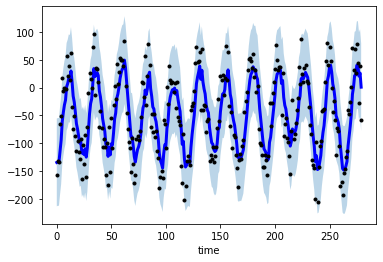

In [4]:
plt.plot(smoother.smooth_data[0], linewidth=3, color='blue')
plt.plot(smoother.data[0], '.k')
plt.xlabel('time')

plt.fill_between(range(len(smoother.data[0])), low[0], up[0], alpha=0.3)

In [5]:
smoother = ConvolutionSmoother(window_len=10, window_type='ones')
smoother.smooth(data)

low, up = smoother.get_intervals('sigma_interval')

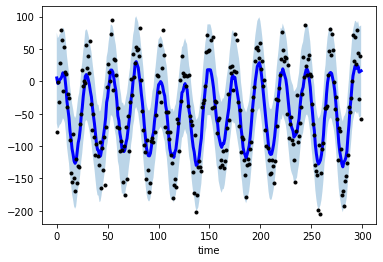

In [6]:
plt.plot(smoother.smooth_data[0], linewidth=3, color='blue')
plt.plot(smoother.data[0], '.k')
plt.xlabel('time')

plt.fill_between(range(len(smoother.data[0])), low[0], up[0], alpha=0.3)

In [7]:
smoother = SplineSmoother(n_knots=30, spline_type='natural_cubic_spline')
smoother.smooth(data)

low, up = smoother.get_intervals('prediction_interval')

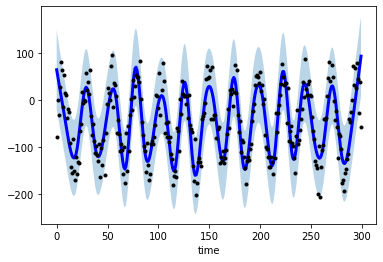

In [8]:
plt.plot(smoother.smooth_data[0], linewidth=3, color='blue')
plt.plot(smoother.data[0], '.k')
plt.xlabel('time')

plt.fill_between(range(len(smoother.data[0])), low[0], up[0], alpha=0.3)

In [23]:
smoother = LowessSmoother(smooth_fraction=0.05, iterations=1)
smoother.smooth(data)

low, up = smoother.get_intervals('prediction_interval')

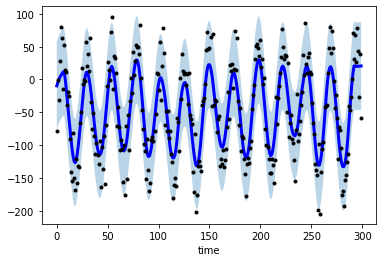

In [24]:
plt.plot(smoother.smooth_data[0], linewidth=3, color='blue')
plt.plot(smoother.data[0], '.k')
plt.xlabel('time')

plt.fill_between(range(len(smoother.data[0])), low[0], up[0], alpha=0.3)

In [11]:
smoother = KalmanSmoother(component='level_season', 
                          component_noise={'level':0.1, 'season':0.1}, 
                          n_seasons=24)
smoother.smooth(data)

low, up = smoother.get_intervals('kalman_interval')

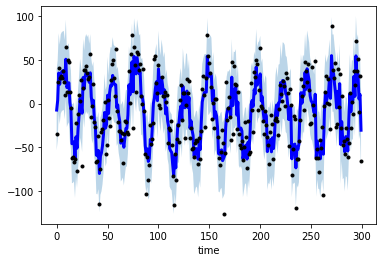

In [12]:
plt.plot(smoother.smooth_data[1], linewidth=3, color='blue')
plt.plot(smoother.data[1], '.k')
plt.xlabel('time')

plt.fill_between(range(len(smoother.data[1])), low[1], up[1], alpha=0.3)

# MULTIPLE SEASONALITY

In [13]:
np.random.seed(33)

data1 = sim_seasonal_data(n_series=10, timesteps=300, 
                          level=0, amp=100, freq=24, measure_noise=30)

data2 = sim_seasonal_data(n_series=10, timesteps=300, 
                          level=0, amp=100, freq=24*7, measure_noise=50)

data = data1 + data2

In [14]:
smoother = ExponentialSmoother(window_len=20, alpha=0.3)
smoother.smooth(data)

low, up = smoother.get_intervals('sigma_interval')

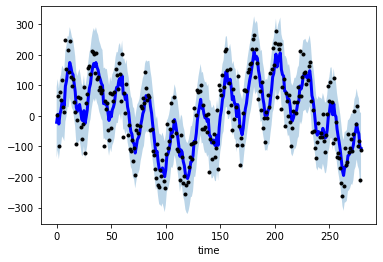

In [15]:
plt.plot(smoother.smooth_data[0], linewidth=3, color='blue')
plt.plot(smoother.data[0], '.k')
plt.xlabel('time')

plt.fill_between(range(len(smoother.data[0])), low[0], up[0], alpha=0.3)

In [16]:
smoother = ConvolutionSmoother(window_len=10, window_type='ones')
smoother.smooth(data)

low, up = smoother.get_intervals('sigma_interval')

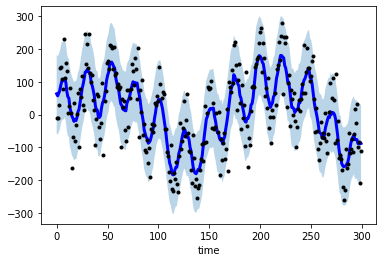

In [17]:
plt.plot(smoother.smooth_data[0], linewidth=3, color='blue')
plt.plot(smoother.data[0], '.k')
plt.xlabel('time')

plt.fill_between(range(len(smoother.data[0])), low[0], up[0], alpha=0.3)

In [18]:
smoother = SplineSmoother(n_knots=30, spline_type='natural_cubic_spline')
smoother.smooth(data)

low, up = smoother.get_intervals('prediction_interval')

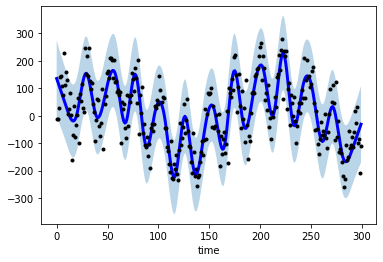

In [19]:
plt.plot(smoother.smooth_data[0], linewidth=3, color='blue')
plt.plot(smoother.data[0], '.k')
plt.xlabel('time')

plt.fill_between(range(len(smoother.data[0])), low[0], up[0], alpha=0.3)

In [20]:
smoother = LowessSmoother(smooth_fraction=0.05, iterations=1)
smoother.smooth(data)

low, up = smoother.get_intervals('prediction_interval')

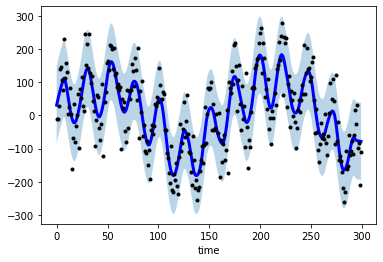

In [21]:
plt.plot(smoother.smooth_data[0], linewidth=3, color='blue')
plt.plot(smoother.data[0], '.k')
plt.xlabel('time')

plt.fill_between(range(len(smoother.data[0])), low[0], up[0], alpha=0.3)

In [22]:
smoother = KalmanSmoother(component='level_season_longseason', 
                          component_noise={'level':0.1, 'season':0.1, 'longseason':0.1}, 
                          n_seasons=24, n_longseasons=24*7)
smoother.smooth(data)

low, up = smoother.get_intervals('kalman_interval')

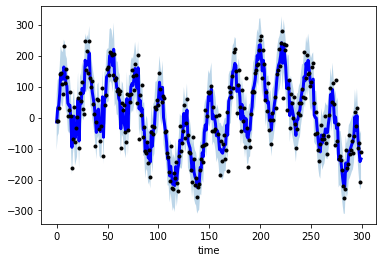

In [23]:
plt.plot(smoother.smooth_data[0], linewidth=3, color='blue')
plt.plot(smoother.data[0], '.k')
plt.xlabel('time')

plt.fill_between(range(len(smoother.data[0])), low[0], up[0], alpha=0.3)